# CMS Distribution: Stacked Bar Plot + Chi-Square Test on cohort RJNA805525

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import os


os.chdir('../../')
os.getcwd()

'd:\\Work\\Non PT\\Data Science\\BG\\mcrc-cetuximab-analysis'

In [3]:
df1 = pd.read_csv("raw/ann_PRJNA805525.csv")
df2 = pd.read_csv("data/ann_with_cms.csv")

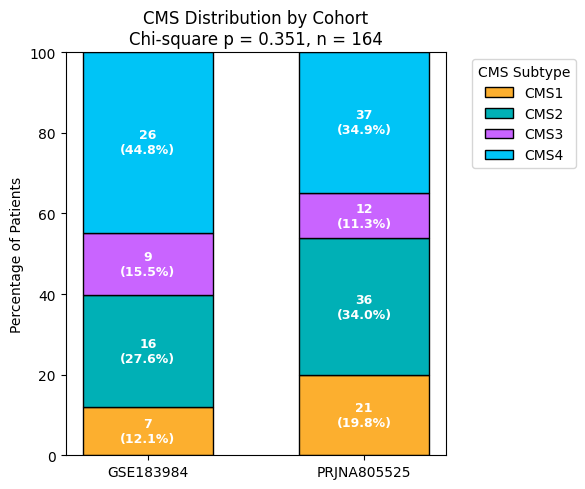

Contingency Table:


CMS_predicted,CMS1,CMS2,CMS3,CMS4
Cohort,,,,
GSE183984,7,16,9,26
PRJNA805525,21,36,12,37


In [4]:
# Define CMS colors
colors = {
    "CMS1": "#FCAF2F",
    "CMS2": "#00B0B6",
    "CMS3": "#C964FF",
    "CMS4": "#00C4F6"
}

# Rename CMS column in df2 to match
df1["CMS_predicted"] = df1["CMS_predicted"]  # already named correctly
df2["CMS_predicted"] = df2["CMS"]            # rename from "CMS" to "CMS_predicted"

# Assign cohort labels
df1["Cohort"] = "PRJNA805525"
df2["Cohort"] = "GSE183984"

# Combine both datasets
combined = pd.concat([df1, df2], ignore_index=True)

# Filter only CMS1–CMS4
combined = combined[combined["CMS_predicted"].isin(colors.keys())]

# Create contingency table
cms_counts = pd.crosstab(combined["Cohort"], combined["CMS_predicted"])
cms_counts = cms_counts[['CMS1', 'CMS2', 'CMS3', 'CMS4']]  # consistent order
cms_percent = cms_counts.div(cms_counts.sum(axis=1), axis=0) * 100
n_total = cms_counts.sum().sum()

# Chi-square test
chi2, p, dof, _ = chi2_contingency(cms_counts)

# Plotting
fig, ax = plt.subplots(figsize=(6, 5))
bottom = np.zeros(len(cms_percent))

for cms in colors:
    vals = cms_percent[cms].values
    counts = cms_counts[cms].values
    ax.bar(cms_percent.index, vals, bottom=bottom,
           label=cms, color=colors[cms], width=0.6, edgecolor="black")

    # Add labels
    for i, (val, btm) in enumerate(zip(vals, bottom)):
        if val > 5:
            ax.text(i, btm + val/2, f"{counts[i]}\n({val:.1f}%)",
                    ha='center', va='center', color='white', fontsize=9, weight='bold')
    bottom += vals

# Formatting
ax.set_ylabel("Percentage of Patients")
ax.set_title(f"CMS Distribution by Cohort\nChi-square p = {p:.3f}, n = {n_total}")
ax.set_ylim(0, 100)
ax.legend(title="CMS Subtype", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Show table
print("Contingency Table:")
display(cms_counts)